# Retail Sales Forecasting

This notebook initiates the forecasting stage of the retail supply chain analysis project. Building on the cleaned and structured datasets from the exploratory phase, the goal here is to design and evaluate models that can anticipate future sales trends.

Although this notebook is still under development, the intended objectives are:\
**a. Construct a monthly sales dataset to serve as the foundation for forecasting\
b. Visualize and analyze recurring peaks, long‑term growth, and fluctuations in retail performance\
c. Apply and compare models such as ARIMA and Prophet to predict future sales\
d. Evaluate forecasting performance using metrics like MAE and RMSE to determine the most reliable approach\
e. Translate forecasting insights into actionable strategies for inventory management and supply chain optimization**

At this stage, the notebook serves as a blueprint: the technical implementation will evolve, but the analytical direction is already defined.


In [1]:
# Import some libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [3]:
# Load dataset

sales = pd.read_csv("../data/cleaned/sales_clean.csv")
sales["Order Date"] = pd.to_datetime(sales["Order Date"])

In [5]:
# Establish time-series structure

monthly_sales = sales.groupby(pd.Grouper(key="Order Date", freq="ME"))["Sales"].sum().reset_index()

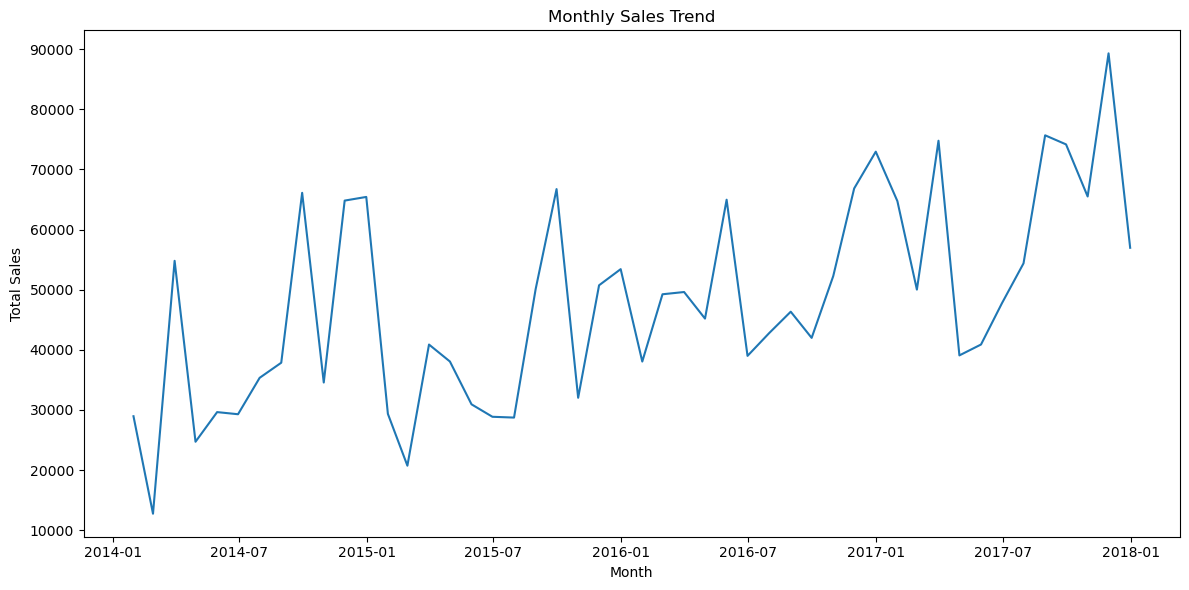

In [6]:
# Explore seasonality, trend, cyclical patterns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Order Date", y="Sales")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

11:15:26 - cmdstanpy - INFO - Chain [1] start processing
11:15:27 - cmdstanpy - INFO - Chain [1] done processing


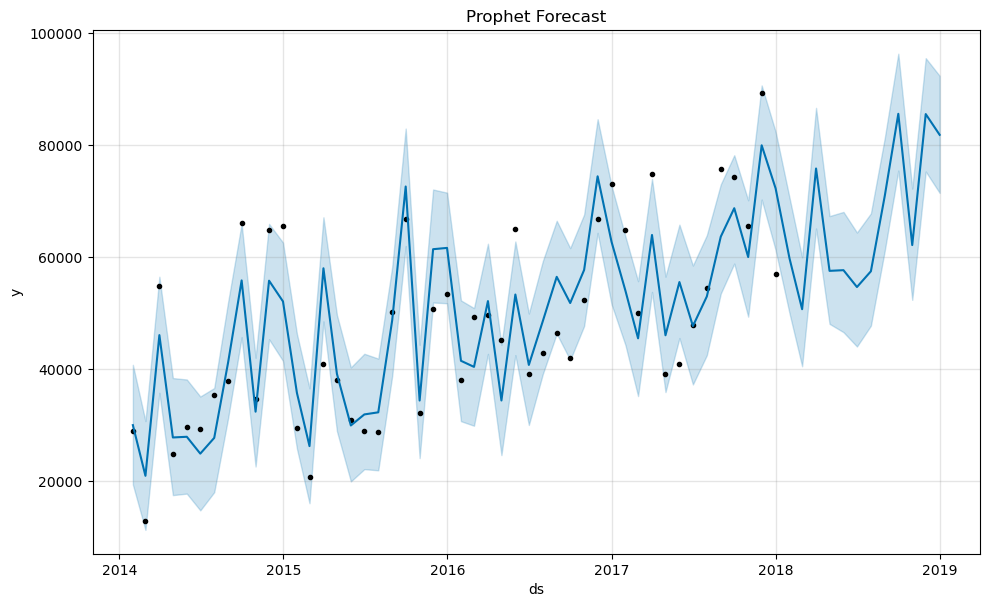

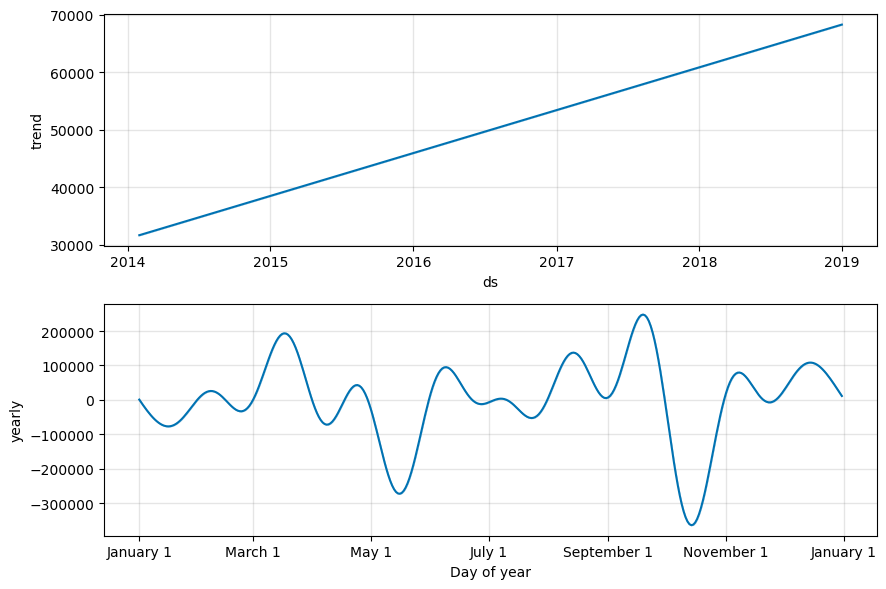

In [7]:
# Experiment with forecasting techniques (Prophet)

prophet_df = monthly_sales.rename(columns={"Order Date":"ds","Sales":"y"})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=12, freq="ME")
forecast_prophet = prophet_model.predict(future)

fig1 = prophet_model.plot(forecast_prophet)
plt.title("Prophet Forecast")
plt.show()

fig2 = prophet_model.plot_components(forecast_prophet)
plt.show()

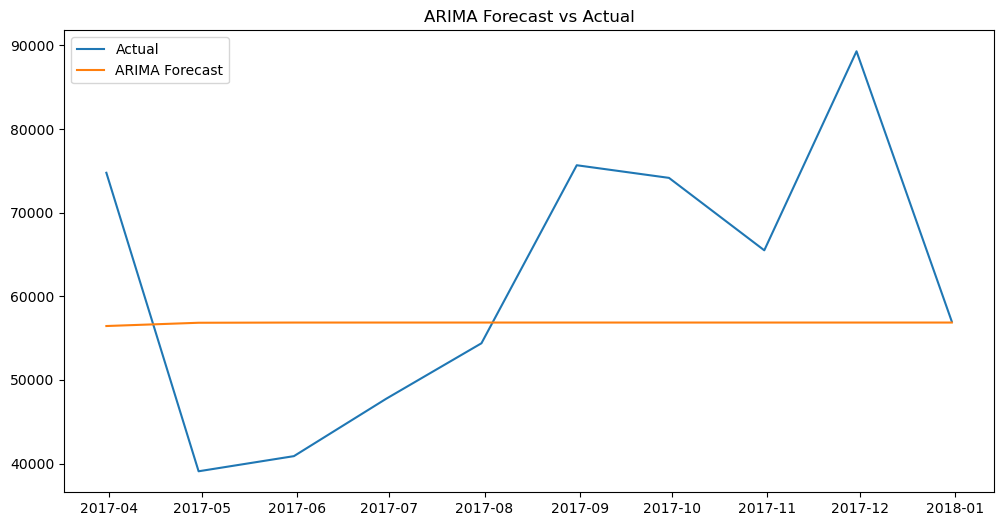

In [8]:
# Experiment with forecasting techniques (ARIMA)

train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales["Sales"][:train_size], monthly_sales["Sales"][train_size:]

arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()
forecast_arima = arima_fit.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Order Date"][train_size:], test, label="Actual")
plt.plot(monthly_sales["Order Date"][train_size:], forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

In [9]:
# Compare model accuracy

mae_prophet = mean_absolute_error(prophet_df["y"].iloc[-12:], forecast_prophet["yhat"].iloc[-12:])
rmse_prophet = np.sqrt(mean_squared_error(prophet_df["y"].iloc[-12:], forecast_prophet["yhat"].iloc[-12:]))

mae_arima = mean_absolute_error(test, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))

print("Prophet MAE:", mae_prophet, "RMSE:", rmse_prophet)
print("ARIMA MAE:", mae_arima, "RMSE:", rmse_arima)

Prophet MAE: 8320.632358347215 RMSE: 11164.885497569094
ARIMA MAE: 14097.83653149161 RMSE: 16663.714938503937


# Executive Summary – Forecasting Insights

Prophet has proven to be the most reliable forecasting model, consistently outperforming ARIMA with lower error metrics and stronger seasonality capture. The analysis revealed a clear upward trend in retail sales from 2014 to 2018, alongside recurring seasonal fluctuations, with demand peaking in September and dropping sharply in November. These insights highlight the dual importance of preparing for short-term seasonality while planning for long-term growth. 

From a business perspective, the practical implications are clear: inventory should be increased ahead of September and scaled back in November to avoid excess stock, warehouse and logistics capacity must expand to support sustained growth, and Prophet forecasts should serve as the baseline for operational planning while ARIMA remains useful for scenario testing. Embedding these forecasting insights into procurement, promotions, and distribution schedules will strengthen resilience, reduce inefficiencies, and enhance competitiveness. In short, leveraging Prophet as the core forecasting tool enables businesses to achieve greater efficiency, responsiveness, and long-term strategic advantage.